# Data Understanding

Revisaremos los datos con los que contamos de la agencia de viajes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/PlatziMaster/Proyecto Agencia de Viajes/datasets'
!ls

/content/drive/My Drive/Colab Notebooks/PlatziMaster/Proyecto Agencia de Viajes/datasets
DataAcomodacion.csv  funciones_auxiliares.ipynb  train_data.txt


In [ ]:
%run funciones_auxiliares.ipynb

## Dependencias

In [ ]:
# Traer librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Carga de Datos:

In [ ]:
f = open("train_data.txt", "r")
data_acomodation = load_data(f)
data_acomodation = dataTypeTransform(data_acomodation)
data_acomodation.head()

,id_viaje,duracion_estadia,genero,edad,ninos,codigo_destino,tipo_acomodacion
0,1010286,7,F,40,0,COL,AirBnB
1,1000152,5,M,<NA>,0,<NA>,AirBnB
2,1009019,4,F,39,1,ES,Hotel
3,1007840,5,F,45,0,NL,Hotel
4,1006939,5,M,45,1,UK,Hotel


## Exploración de datos:

### Pasos de la Exploración de datos

Se realizaran los siguientes pasos para la Exploración de datos:

1. Identificación de variables
2. Analisis univariado
3. Analisis bi-variado

Pasos se toman a recomendación del blog: https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#one

sin embargo se realiza diferencia, tomando unicamente los tres primeros presentados en el blog para este paso, y dejando los ultimos 4 para siguientes pasos en el proceso.

### 1. Identificación de variables

Parte de este proceso se realizo en la descripcion de los datos, en este caso nos centraremos en detallar esta identificación 

In [ ]:
data_acomodation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 9867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id_viaje          9868 non-null   Int64   
 1   duracion_estadia  9868 non-null   Int64   
 2   genero            9868 non-null   category
 3   edad              8874 non-null   Int64   
 4   ninos             8897 non-null   string  
 5   codigo_destino    8872 non-null   string  
 6   tipo_acomodacion  9868 non-null   string  
dtypes: Int64(3), category(1), string(3)
memory usage: 578.3 KB


### 2. Analisis univariado

Evaluaremos las variables una a una.
Dependemos de si la variable es de tipo categorica o numerica.

#### Variables continuas

En caso de las variables continuas, necesitamos comprender tendencia central y dispersión.

#### Variables Categoricas

Comprender la distribución de cada categoria.

#### Descripcion de variables Cuantitativas

In [ ]:
# setear presentacion floteantes
pd.set_option('display.float_format','{:,.1f}'.format)

In [ ]:
num_cols = list(data_acomodation.select_dtypes(include=['int64', 'float']).columns)
num_cols.remove('id_viaje')
data_acomodation[num_cols].describe()

,duracion_estadia,edad
count,"9,868.0","8,874.0"
mean,4.0,40.4
std,1.7,5.0
min,1.0,22.0
25%,3.0,37.0
50%,4.0,40.0
75%,5.0,44.0
max,13.0,59.0


#### Descripcion de variables Cualitativas

In [ ]:
cat_cols = list(data_acomodation.select_dtypes(include=['string', 'boolean', 'category']).columns)
freq_table(data_acomodation, cat_cols)

  index  genero  frequency
0     F    4981        0.5
1     M    4887        0.5
  index  ninos  frequency
0     1   4488        0.5
1     0   4409        0.4
  index  codigo_destino  frequency
0    US            1161        0.1
1   COL            1150        0.1
2    IT            1114        0.1
3    AR            1107        0.1
4    NL            1101        0.1
5    PE            1095        0.1
6    UK            1086        0.1
7    ES            1058        0.1
    index  tipo_acomodacion  frequency
0   Hotel              5592        0.6
1  AirBnB              4276        0.4


#### Graficos de barras

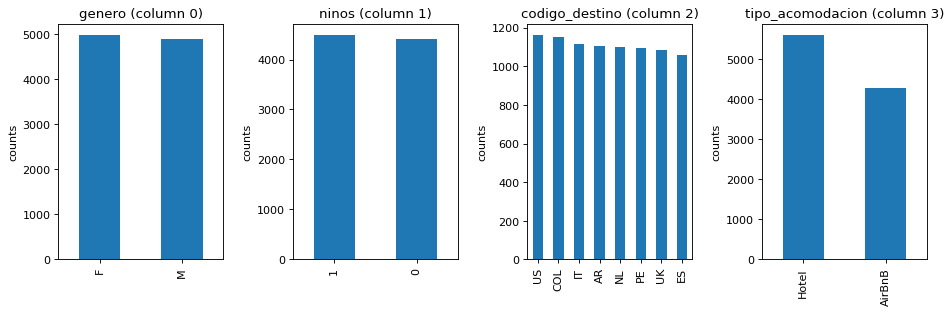

In [ ]:
plotBarPerColumns(data_acomodation, cat_cols, 4)

En estos encontramos que en las variables categoricas, estan distribuidas de manera muy uniforme, sin tener algúna que sea predominante, en cada categoria

#### Grafico Histograma

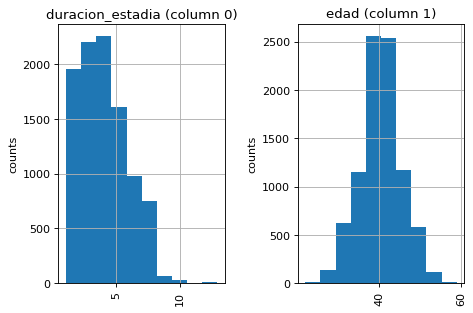

In [ ]:
plotHistPerColumns(data_acomodation, num_cols, 2)

Vemos que la `duracion_estadia` tiene un comportamiento **right skewed**, y el comportamiento de la `edad` es aparentemente simetrico-

### 3. Analisis bivariado

Analisis mediante el cual encontraremos la relación entre dos variables.

Se puede usar para ver la combinación entre varios tipos de variables.

#### Continuas & continuas

Miramos los graficos de dispersión y la correlación entre variables.

#### Categoricas & Categoricas

Podemos mirar por:
* Tablas de dos vías
* Stacked column Chart
* Chi-Square test

#### Categoricas & Continuas

* Z-Test/T-test

Debido a que nuestro interes es principalmente con, la columna `tipo_acomodacion`, realizaremos comparaciones con esta variable.


In [ ]:
data_acomodation['ones'] = 1

In [ ]:
df1 = data_acomodation.groupby([ 'tipo_acomodacion' ,'genero'])['ones'].count()
df2 = data_acomodation.groupby( 'tipo_acomodacion')['ones'].count()
acomodation_by_gender = df1/df2*100
acomodation_by_gender.rename('porcentaje')

tipo_acomodacion  genero
AirBnB            F        49.7
                  M        50.3
Hotel             F        51.1
                  M        48.9
Name: porcentaje, dtype: float64

In [ ]:
df1 = data_acomodation.groupby(['genero', 'tipo_acomodacion'])['ones'].count()
df2 = data_acomodation.groupby('genero')['ones'].count()
acomodation_by_gender = df1/df2*100
acomodation_by_gender.rename('porcentaje')

genero  tipo_acomodacion
F       AirBnB             42.6
        Hotel              57.4
M       AirBnB             44.0
        Hotel              56.0
Name: porcentaje, dtype: float64

In [ ]:
print(57.4 - 42.6)
print(56.0 - 44.0)

14.799999999999997
12.0


Podemos evidenciar dos aspectos iteresantes:
* Por ambos generos existe una preferencia por el uso de hoteles, teniendo las mujeres una mayor preferencia con un 14.8 % frente al 12.0 % de los hombres.
* Adicional podemos evidenciar, que en el uso de AirBnB o de hoteles, no existe una clara diferencia entre generos.


In [ ]:
df1 = data_acomodation.groupby(['tipo_acomodacion', 'ninos'])['ones'].count()
df2 = data_acomodation.groupby(['tipo_acomodacion'])['ones'].count()
acomodation_by_kids = df1/df2*100
acomodation_by_kids.rename('porcentaje')

tipo_acomodacion  ninos
AirBnB            0       44.2
                  1       46.1
Hotel             0       45.1
                  1       45.0
Name: porcentaje, dtype: float64

In [ ]:
df1 = data_acomodation.groupby(['ninos','tipo_acomodacion'])['ones'].count()
df2 = data_acomodation.groupby(['ninos'])['ones'].count()
acomodation_by_kids = df1/df2*100
acomodation_by_kids.rename('porcentaje')

ninos  tipo_acomodacion
0      AirBnB             42.8
       Hotel              57.2
1      AirBnB             44.0
       Hotel              56.0
Name: porcentaje, dtype: float64

In [ ]:
print(57.2 - 42.8)
print(56.0 - 44.0)

14.400000000000006
12.0


Podemos evidenciar dos aspectos iteresantes:
* En ambos grupos los que viajan con niños y los que no, existe una mayor preferencia por el uso de hoteles siendo mayor en grupos con niños con una diferencia del 14.4 % frente al 12.0 % de los grupos sin niños.
* Adicional podemos evidenciar, que en el uso de AirBnB o de hoteles, no se evidencia una diferencia importante entre sin el grupo tiene o no niños.


In [ ]:
df1 = data_acomodation.groupby(['tipo_acomodacion', 'codigo_destino'])['ones'].count().sort_values(ascending = False)
df2 = data_acomodation.groupby(['tipo_acomodacion'])['ones'].count()
acomodation_by_kids = df1/df2*100
acomodation_by_kids.rename('porcentaje')

tipo_acomodacion  codigo_destino
Hotel             US               11.9
                  AR               11.7
                  IT               11.5
                  UK               11.5
                  COL              11.1
                  NL               10.9
                  PE               10.9
                  ES               10.5
AirBnB            COL              12.4
                  US               11.6
                  NL               11.5
                  PE               11.4
                  ES               11.0
                  IT               11.0
                  AR               10.6
                  UK               10.4
Name: porcentaje, dtype: float64

In [ ]:
acomodation_by_kids = acomodation_by_kids.reset_index()
acomodation_by_kids = pd.DataFrame(acomodation_by_kids)

In [ ]:
print(acomodation_by_kids[acomodation_by_kids['tipo_acomodacion'] == 'Hotel']['ones'].mean())
print(acomodation_by_kids[acomodation_by_kids['tipo_acomodacion'] == 'AirBnB']['ones'].mean())

11.239270386266096
11.237137511693168


In [ ]:
df1 = data_acomodation.groupby(['codigo_destino','tipo_acomodacion'])['ones'].count()
df2 = data_acomodation.groupby(['codigo_destino'])['ones'].count()
acomodation_by_kids = df1/df2*100
acomodation_by_kids.rename('porcentaje')

codigo_destino  tipo_acomodacion
AR              AirBnB             40.8
                Hotel              59.2
COL             AirBnB             46.1
                Hotel              53.9
ES              AirBnB             44.6
                Hotel              55.4
IT              AirBnB             42.2
                Hotel              57.8
NL              AirBnB             44.5
                Hotel              55.5
PE              AirBnB             44.5
                Hotel              55.5
UK              AirBnB             41.0
                Hotel              59.0
US              AirBnB             42.9
                Hotel              57.1
Name: porcentaje, dtype: float64

In [ ]:
country_list = list(acomodation_by_kids.index)
for i in range(len(list(country_list))-1):
  if country_list[i][0] == country_list[i + 1][0]:
    print(country_list[i][0])
    print(acomodation_by_kids[i + 1] - acomodation_by_kids[i])  

AR
18.337850045167123
COL
7.826086956521735
ES
10.775047258979207
IT
15.619389587073613
NL
10.990009082652136
PE
11.050228310502291
UK
18.047882136279924
US
14.211886304909562


* El pais que mas usa hoteles frente a AirBnB, es `Argentina` con una diferencia entre ambos del 18.33%, seguido de cerca por `Reino Unido` con un 18.04 %, y el pais con la menor diferencia es `Colombia` con un 7.83%
* El pais que mas usa AirBnB es `Colombia` con un 12.4 %, con una diferencia sobre la media de 1.16%

In [ ]:
df1 = data_acomodation[data_acomodation['tipo_acomodacion']=='Hotel'].groupby(['genero', 'codigo_destino'])['ones'].count()
df2 = data_acomodation[data_acomodation['tipo_acomodacion']=='AirBnB'].groupby(['genero', 'codigo_destino'])['ones'].count()

In [ ]:
df3 = data_acomodation[data_acomodation['tipo_acomodacion']=='Hotel'].groupby(['genero'])['ones'].count()
hotel_destination_by_gender = df1/df3*100
hotel_destination_by_gender.rename('porcentaje')
hotel_destination_by_gender

genero  codigo_destino
F       AR               11.5
        COL              10.6
        ES               10.5
        IT               11.7
        NL               10.2
        PE               11.5
        UK               11.7
        US               11.8
M       AR               11.9
        COL              11.6
        ES               10.4
        IT               11.3
        NL               11.7
        PE               10.2
        UK               11.2
        US               11.9
Name: ones, dtype: float64

In [ ]:
df4 = data_acomodation[data_acomodation['tipo_acomodacion']=='AirBnB'].groupby(['genero'])['ones'].count()
Airbnb_destination_by_gender = df2/df4*100
Airbnb_destination_by_gender.rename('porcentaje')
Airbnb_destination_by_gender

genero  codigo_destino
F       AR               10.3
        COL              12.7
        ES               11.3
        IT               10.8
        NL               11.0
        PE               11.6
        UK               10.1
        US               11.6
M       AR               10.8
        COL              12.1
        ES               10.7
        IT               11.2
        NL               11.9
        PE               11.2
        UK               10.7
        US               11.7
Name: ones, dtype: float64

In [ ]:
df1 = data_acomodation[data_acomodation['tipo_acomodacion']=='Hotel'].groupby(['genero', 'ninos'])['ones'].count()
df2 = data_acomodation[data_acomodation['tipo_acomodacion']=='Hotel'].groupby(['genero'])['ones'].count()
Hotel_gender_kids = df1/df2*100
Hotel_gender_kids.rename('porcentaje')

genero  ninos
F       0       45.6
        1       44.7
M       0       44.5
        1       45.3
Name: porcentaje, dtype: float64

In [ ]:
df1 = data_acomodation[data_acomodation['tipo_acomodacion']=='AirBnB'].groupby(['genero', 'ninos'])['ones'].count()
df2 = data_acomodation[data_acomodation['tipo_acomodacion']=='AirBnB'].groupby(['genero'])['ones'].count()
Airbnb_gender_kids = df1/df2*100
Airbnb_gender_kids.rename('porcentaje')

genero  ninos
F       0       45.5
        1       44.2
M       0       42.8
        1       48.0
Name: porcentaje, dtype: float64

In [ ]:
df1 = data_acomodation[data_acomodation['tipo_acomodacion']=='Hotel'].groupby(['ninos', 'codigo_destino'])['ones'].count()
df2 = data_acomodation[data_acomodation['tipo_acomodacion']=='Hotel'].groupby(['ninos'])['ones'].count()
Hotel_kids_country = df1/df2*100
Hotel_kids_country.rename('porcentaje')

ninos  codigo_destino
0      AR               11.2
       COL              11.3
       ES               10.5
       IT               11.2
       NL               10.3
       PE               12.0
       UK               11.3
       US               11.9
1      AR               12.2
       COL              11.1
       ES               10.2
       IT               11.9
       NL               11.6
       PE               10.0
       UK               11.4
       US               12.0
Name: porcentaje, dtype: float64

In [ ]:
df1 = data_acomodation[data_acomodation['tipo_acomodacion']=='AirBnB'].groupby(['ninos', 'codigo_destino'])['ones'].count()
df2 = data_acomodation[data_acomodation['tipo_acomodacion']=='AirBnB'].groupby(['ninos'])['ones'].count()
AirBnB_kids_country = df1/df2*100
AirBnB_kids_country.rename('porcentaje')

ninos  codigo_destino
0      AR               11.2
       COL              13.2
       ES               11.7
       IT               10.8
       NL               10.0
       PE               11.7
       UK                9.7
       US               11.2
1      AR                9.8
       COL              11.5
       ES               10.6
       IT               11.6
       NL               12.6
       PE               11.3
       UK               10.8
       US               12.3
Name: porcentaje, dtype: float64

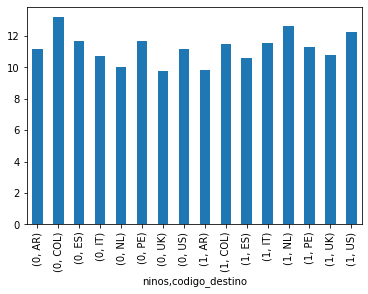

In [ ]:
AirBnB_kids_country.plot(kind='bar')

Esta forma muestra una tendencia interesante puesto que existe una tendencia en Colombia, que se prefiere una reserva en AirBnB que en un Hotel.


In [ ]:
condition = (data_acomodation['codigo_destino'] == 'COL')
df1 = data_acomodation[condition].groupby(['ninos', 'tipo_acomodacion'])['ones'].count()
df2 = data_acomodation[condition].groupby(['ninos'])['ones'].count()
col_kids_acomodation = df1/df2 * 100
col_kids_acomodation

ninos  tipo_acomodacion
0      AirBnB             46.7
       Hotel              53.3
1      AirBnB             45.0
       Hotel              55.0
Name: ones, dtype: float64

In [ ]:
condition = (data_acomodation['codigo_destino'] == 'COL')
df1 = data_acomodation[condition].groupby(['tipo_acomodacion', 'ninos'])['ones'].count()
df2 = data_acomodation[condition].groupby(['tipo_acomodacion'])['ones'].count()
col_kids_acomodation = df1/df2 * 100
col_kids_acomodation

tipo_acomodacion  ninos
AirBnB            0       47.0
                  1       42.8
Hotel             0       45.8
                  1       44.8
Name: ones, dtype: float64

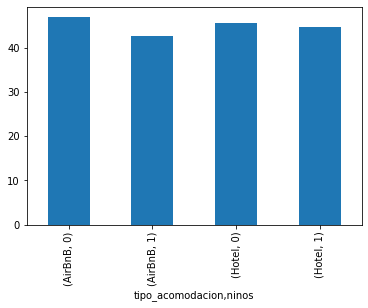

In [ ]:
col_kids_acomodation.plot(kind='bar')

In [ ]:
df1 / data_acomodation[condition]['ones'].count() * 100

tipo_acomodacion  ninos
AirBnB            0       21.7
                  1       19.7
Hotel             0       24.7
                  1       24.2
Name: ones, dtype: float64

Podemos evidencias que existe una disminucion en la tendencia, de realizar la reserva en AirBnB si se tienen hijos en Colombia.

In [ ]:
countries = list(data_acomodation['codigo_destino'].value_counts().index)
countries

['US', 'COL', 'IT', 'AR', 'NL', 'PE', 'UK', 'ES']

In [ ]:
for country in countries:
  print('='*40)
  print(country)
  print('Tabla de niños vs tipo de acomodacion')
  condition = (data_acomodation['codigo_destino'] == country)
  df1 = data_acomodation[condition].groupby(['ninos', 'tipo_acomodacion'])['ones'].count()
  df2 = data_acomodation[condition].groupby(['ninos'])['ones'].count()
  col_kids_acomodation = df1/df2 * 100
  print(col_kids_acomodation)
  print('Tabla de tipo de acomodacio vs niños')
  df1 = data_acomodation[condition].groupby(['tipo_acomodacion', 'ninos'])['ones'].count()
  df2 = data_acomodation[condition].groupby(['tipo_acomodacion'])['ones'].count()
  col_kids_acomodation = df1/df2 * 100
  print(col_kids_acomodation)
  print('Tabla de tipo de acomodacio(Total) vs niños')
  col_kids_acomodation = df1 / data_acomodation[condition]['ones'].count() * 100
  print(col_kids_acomodation)

US
Tabla de niños vs tipo de acomodacion
ninos  tipo_acomodacion
0      AirBnB             41.4
       Hotel              58.6
1      AirBnB             44.6
       Hotel              55.4
Name: ones, dtype: float64
Tabla de tipo de acomodacio vs niños
tipo_acomodacion  ninos
AirBnB            0       42.4
                  1       48.6
Hotel             0       45.1
                  1       45.4
Name: ones, dtype: float64
Tabla de tipo de acomodacio(Total) vs niños
tipo_acomodacion  ninos
AirBnB            0       18.2
                  1       20.8
Hotel             0       25.8
                  1       25.9
Name: ones, dtype: float64
COL
Tabla de niños vs tipo de acomodacion
ninos  tipo_acomodacion
0      AirBnB             46.7
       Hotel              53.3
1      AirBnB             45.0
       Hotel              55.0
Name: ones, dtype: float64
Tabla de tipo de acomodacio vs niños
tipo_acomodacion  ninos
AirBnB            0       47.0
                  1       42.8
Hotel        

Encontramos que debido a se prefiere en general, el uso de Hoteles a AirBnB, cada categorizacion presenta una inclinacion al uso de hoteles. Sin embargo dentro de los grupos que escogieron alguna opcion, en las categorias no se presenta una tendencia predominante por alguna. Sin embargo se presenta una tendencia en Colombia en Colombia superior a otros paises, en escoger AirBnB cuando no hay niños en el grupo